# Creating a Stress Detection Tool using Data From Mental Health Subreddits: Preprocessing with VADER

#### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 8)
import seaborn as sns
sns.set(style='whitegrid', palette='Dark2')
from wordcloud import WordCloud

#### Import dataframe from pickle

In [2]:
df = pd.read_pickle('df.pickle')

#### Begin sentiment analysis
* Here I am using the Sentiment Intensity Analyzer from VADER

In [3]:
sid = SentimentIntensityAnalyzer()

* First the Sentiment Intensity Analyzer will assign a 'negative,' 'neutral,' and 'positive' score to each comment
* Because VADER is sensitive to case and punctuation, I am sure to use it on the original text column rather than the preprocessed column

In [4]:
df['scores'] = df['text'].apply(lambda review: sid.polarity_scores(review))

* Using the polarity scores, a compound score is generated which is rated on a scale from -1 to 1

In [5]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

* The final score is assigned based on the compound score
* Knowing that a compound score of less than 0 would be considered negative and a compound score of higher than 0 would be considered positive, I added a column for the final score based on those values

In [6]:
df['score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

#### Review dataframe

In [7]:
df.head()

,subreddit,text,text_preproc,scores,compound,score
0,ADHD,"I finally cleaned my entire living space, and ...",i finally cleaned my entire living space and d...,"{'neg': 0.0, 'neu': 0.77, 'pos': 0.23, 'compou...",0.7558,pos
1,ADHD,I found this subreddit,i found this subreddit,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
2,ADHD,Made it through the first week of spring term!...,made it through the first week of spring term ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
3,ADHD,I finally got my Adderall prescription yesterd...,i finally got my adderall prescription yesterd...,"{'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'comp...",0.8537,pos
4,ADHD,I finally got my info together to send to my a...,i finally got my info together to send to my a...,"{'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'comp...",0.7346,pos


#### Review values

* View histogram of compound distribution

<AxesSubplot: >

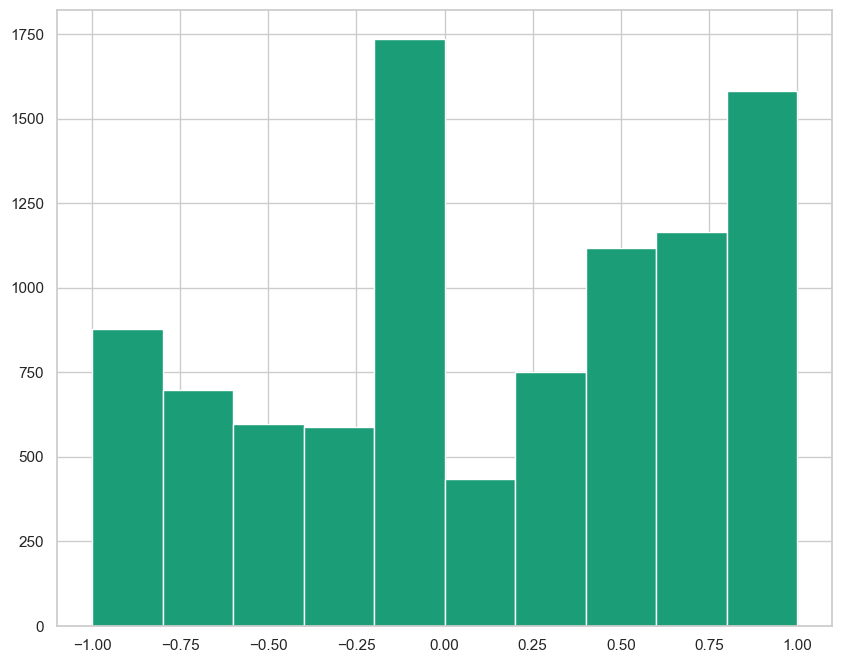

In [8]:
df['compound'].hist()

* Count score values

In [9]:
df['score'].value_counts()

pos    6369
neg    3177
Name: score, dtype: int64

* Display pie chart

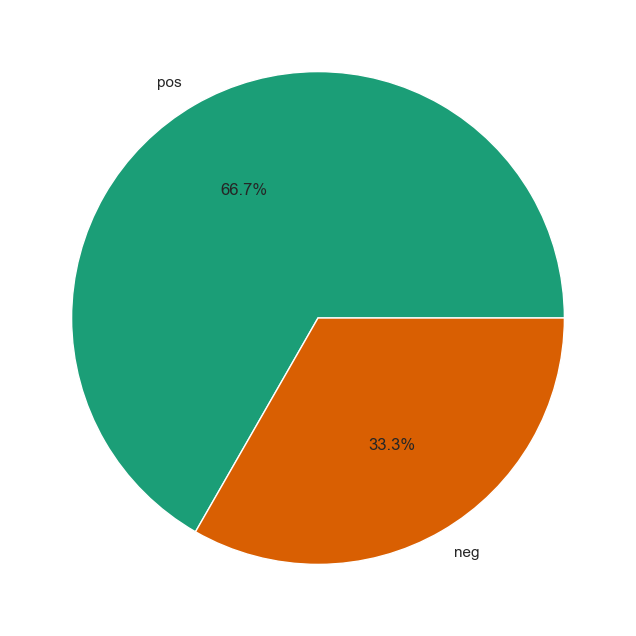

In [10]:
plt.pie(df['score'].value_counts(), labels=df['score'].unique().tolist(), autopct='%1.1f%%')
plt.show()

#### Save to pickle

In [11]:
df.to_pickle('df.pickle') 